<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_Knapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe Knapsack (El problema de la mochila)**

## **1. Problema de la mochila**


Dados los pesos y valores de $i$ artículos, coloque estos artículos en una mochila de capacidad W para obtener el valor total máximo en la mochila.

---
**Entrada**: Conjunto de valores $value = \{v_1, v_2, v_3, ..., v_i\}$ y pesos $weight = \{w_1, w_2, w_3, ..., w_i\}$ asociados a una cantidad $i$ de artículos de forma respectiva, además de una capacidad máxima de peso soportado $W$.

**Salida**: el subconjunto de valor máximo de $value$ tal que la suma de los pesos de este subconjunto sea menor o igual a $W$.

---


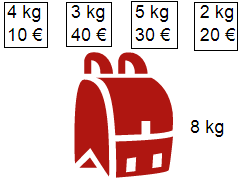

## **2. Knapsack**

### **2.1. Descripción del algoritmo**


Supongamos la situación de que queremos robar un museo lleno de toda clase de artículos de valor, pero solo tenemos una mochila con capacidad máxima para cargar artículos.

**Como ejemplo, los artículos disponibles son:**

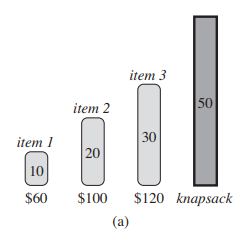

**Podemos armar de distintas formas la mochila, pero hay pocas combinaciones para maximizar la ganancia posible.**

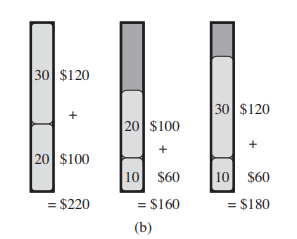

**En este caso el máximo valor obtenido es cargando la mochila con los items 2 y 3, dando una ganancia de \$220 y peso de 50kg**

Como podríamos resolver el problema algorítmicamente, pues se puede utilizar un enfoque ingenuo para obtener la solución, lo que significaría probar con cada objeto y forma de cargar la mochila comparando posteriormente las ganacias obtenidas, buscando la máxima posible, pero es evidente que no es lo más óptimo, el tiempo de ejecución de un algoritmo con este enfoque tendría tiempo exponencial de $O(2^n)$. Se formaría el siguiente árbol de subproblemas:

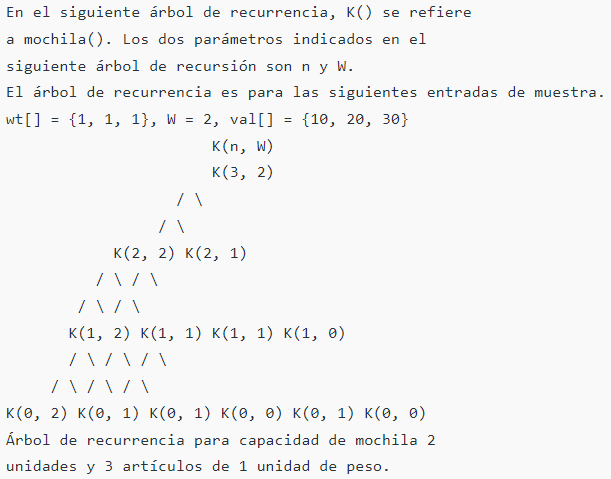

Como podemos observar en el árbol, existen problemas solapados como $k(1,1)$, lo que nos indica que podría darse una solución con enfoque dinámico, solo basta con describir una subestructura óptima como la siguiente:

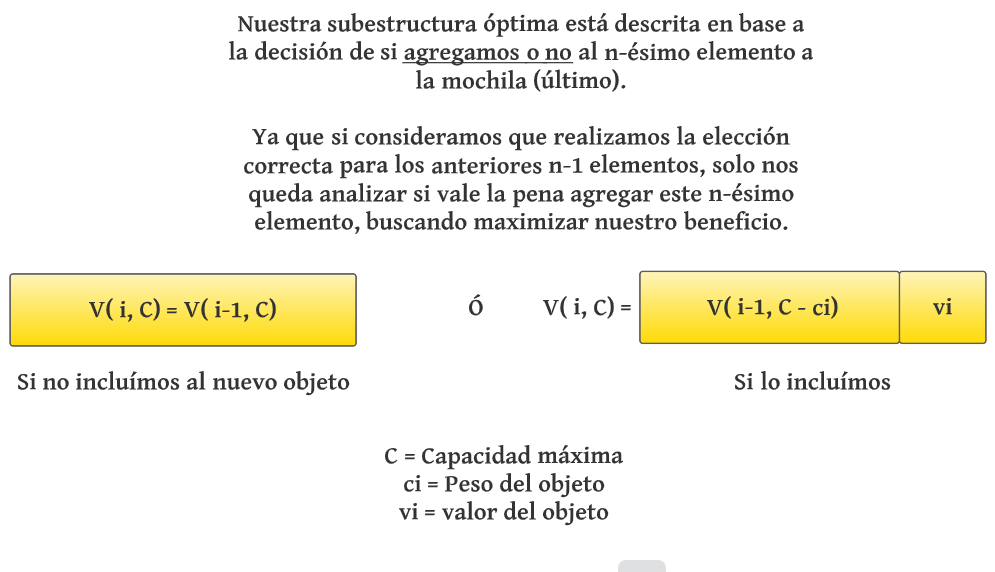

#### **Ejemplo del uso de la programación dinámica**
Para encontrar la solución de esta forma utilizaremos una matriz de valores $V[][]$ para almacenar todas las subsoluciones. También obtendremos la siguiente función a partir de la subestructura óptima para llenar la matriz:

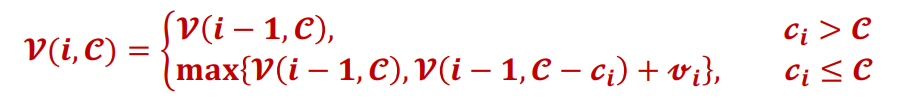

A continuación resolveremos un ejemplo para explicar como funciona el algoritmo:

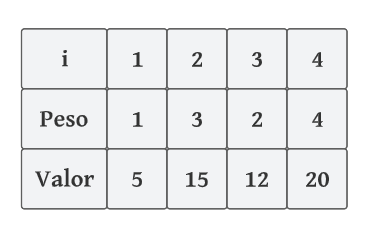

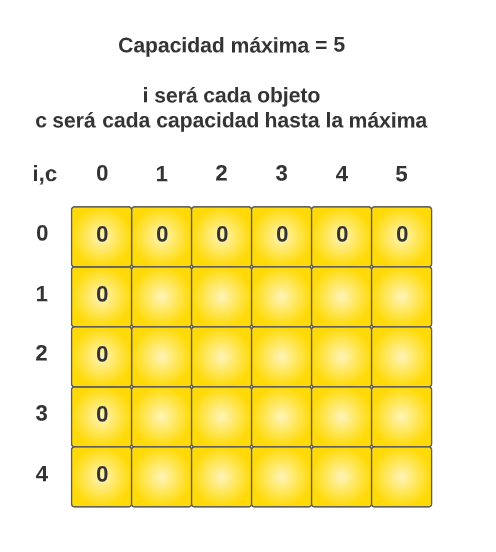

Se inicializa en ceros la primera fila y la primera columna que son triviales, ya que no existe capacidad y/o ningun objeto:

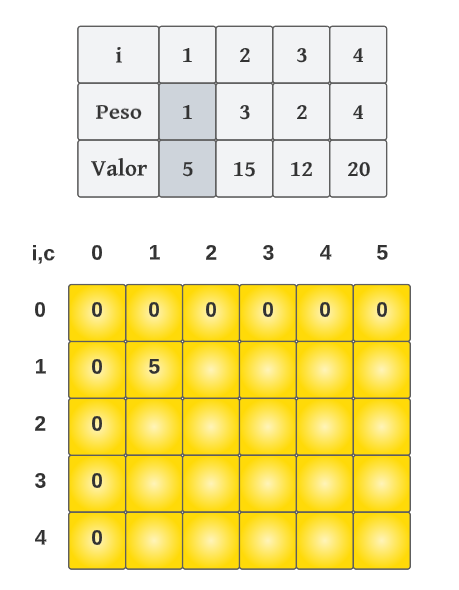

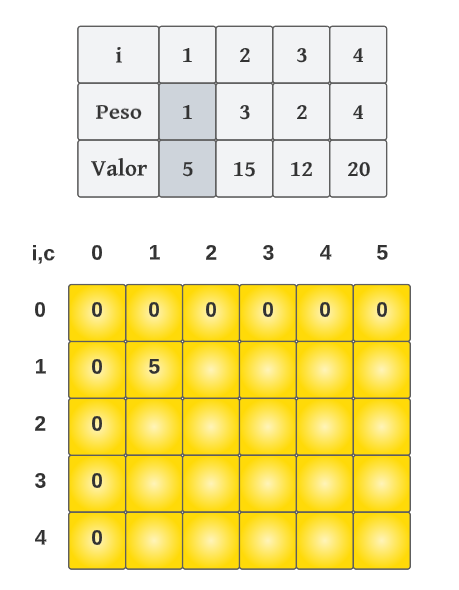

Casilla V[1][1]:

Si cabe (ci = 1) <= 1

V[1][1] = max(V[0][1] , V[0][0] + vi)

V[1][1] = max(0 , 5)

V[1][1] = 5

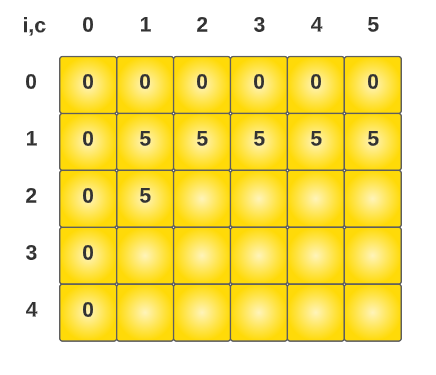

Casilla V[2][1]:

No cabe (ci = 3) > 1

V[2][1] = V[1][1]

V[2][1] = 5

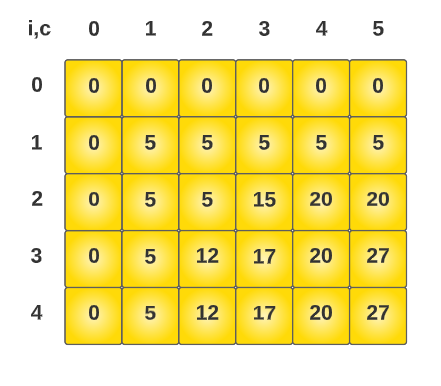

Así hasta completarla, obteniendo en la casilla final V[4][5] = 27 el máximo beneficio.

Si lo que deseamos es la secuencias de objetos cargados en la mochila, es posible obtenerlo de la tabla. Se marcan los objetos que aparecen, si el número se repite se agrega un 0 y a i se le resta 1; si no ocurre se agrega un 1, a i se le resta 1 y a C se le resta ci.


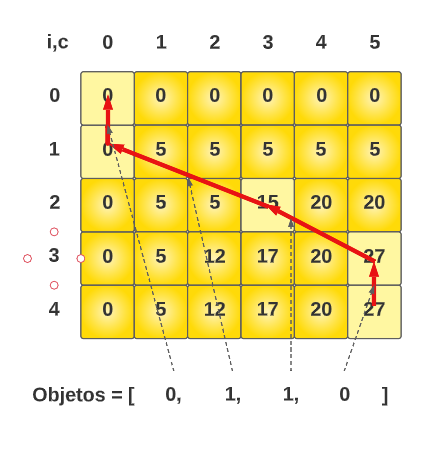

Los artículos escogidos fueron el 2 y 3, con ganancia total de 27 y capacidad alcanzada de 5.

### **2.2. Implementación del algoritmo con acercamiento Bottom-up**

In [50]:
#Analiza la matriz solución para encontrar los objetos considerados
def print_sol(V, c_max, peso, valor):
  i = len(peso)
  c = c_max
  objetos = []
  v_max = V[i][c_max]

  while(i != 0): #Mientras existan artículos considerados
    if(v_max == V[i-1][c]): #Si no se considera el objeto
      objetos.append(0)
      i -= 1                #Se analiza el anterior
    else:
      objetos.append(1)     #Si se considera
      i -= 1                #Se revisa el objeto anterior
      c -= peso[i]          #Pero la capacidad se reduce
      v_max = V[i][c]       

  print("Objetos en la bolsa de capacidad máxima "+ str(c_max) +":")
  objetos = list(reversed(objetos))
  peso_total = 0
  for i in range(len(valor)):
    if(objetos[i] == 1):
      peso_total += peso[i]
      print("Objeto " + str(i+1) + " = " + str(valor[i])+ " y peso = " + str(peso[i]))
  print("Valor total = " + str(V[len(valor)][c_max]))
  print("Peso total = " + str(peso_total))
  

In [51]:
#Función solo para verbose, muestra la matriz y los indices
def printMatriz(V, n, c_max): 
  for i in range(n + 1):
    if i == 0:
      for k in range(c_max + 1): 
        if k == 0:
          print(end = "  ")
        print(k, end = " ")
      print("")    
    for j in range(c_max + 1):
      if j == 0:
        print(i, end=" ")
      print(V[i][j], end=" ")
      if j == c_max:
        print("")
  print("")
      

In [52]:
def knap_sack(c_max, peso, valor, verbose = False):
  V = list() # Matriz de valores
  n = len(valor) #n° de elementos
  cont = 0

  if(verbose):
    print("Se creará una matriz que almacene las soluciones por cada artículo considerado")
    print("y por cada capacidad máxima, ambos desde 0 hasta su valor real: ")
  #Se inicializa la matriz de valores y valores triviales
  for i in range(n + 1): 
    if(verbose and i == 0):
      for k in range(c_max + 1):
        if k == 0:
          print(end = "  ")
        print(k, end = " ")
      print("")
    V.append([])         
    for j in range(c_max + 1):
      if verbose:
        if j == 0:
          print(i, end=" ")
        print("_", end=" ")
        if j == c_max:
          print()
      V[i].append(0)

  if verbose:
    print("\nSe inicializa la matriz en 0, pero realmente los casos ")
    print("triviales con 0 son la primera fila y la primera columna, donde")
    print("no hay artículos considerados ni capacidad para la mochila")
    printMatriz(V, n, c_max)
    print("Ahora procederemos a llenar la matriz con la función descrita")

  #Se recorre por los objetos y capacidades máxima (índices de la matriz)
  for i in range(1, n + 1):
    for c in range(1, c_max + 1):
      cont += 1
      if verbose:
        print("Matriz V posición " + str(i)+ ", " + str(c))
        print("Artículo " + str(i)+ " y capacidad máxima " + str(c))
      #Función para obtener las soluciones óptimas siguientes 
      #a partir de las soluciones anteriores
      if peso[i-1] <= c: #Si cabe el objeto en la mochila
        if verbose:
          print("El objeto " + str(i) + " cabe en la mochila")
          if (V[i-1][c] >= (V[i-1][c-peso[i-1]] + valor[i-1])):
            print("No vale la pena añadir el objeto")
            print("Se copia la solución anterior con un objeto menos, pero misma capacidad")
          else:
            print("Se añade el nuevo artículo considerando el valor de este")
            print("más la ganancia máxima obtenida con los objetos anteriores")
            print("y el peso reducido por este nuevo artículo")
              
      #Se decide el máximo valor de <si vale la pena incluir al objeto o no>
        V[i][c] = max(V[i-1][c], V[i-1][c-peso[i-1]] + valor[i-1])
      else:#Si no cabe
        if verbose:
          print("El objeto " + str(i) + " no cabe en la mochila")
          print("Se copia la solución anterior con un objeto menos, pero misma capacidad")
      #Se copia la solución anterior que contiene solo a objetos anteriores
        V[i][c] = V[i-1][c]
      if verbose:
        printMatriz(V, n, c_max) 

  return V, cont 


In [53]:
capacidad_max = 30
valores = [3,2,5,4,1,10,7,9,8,6]
pesos = [9,7,10,1,2,4,5,6,8,3]
n = len(valores)
print("Para una capacidad máxima de:", capacidad_max)
print("Objetos:")
for i in range(n):
  print(i+1, end = "  ")
print("\nValores:")
for i in range(n):
  print(valores[i], end = "  ")
print("\nPesos:")
for i in range(n):
  print(pesos[i], end = "  ")
print("\n")

valor_max, c = knap_sack( capacidad_max, pesos, valores)
print_sol(valor_max, capacidad_max, pesos, valores)
print("Cantidad de subproblemas resueltos:", c)


Para una capacidad máxima de: 30
Objetos:
1  2  3  4  5  6  7  8  9  10  
Valores:
3  2  5  4  1  10  7  9  8  6  
Pesos:
9  7  10  1  2  4  5  6  8  3  

Objetos en la bolsa de capacidad máxima 30:
Objeto 4 = 4 y peso = 1
Objeto 5 = 1 y peso = 2
Objeto 6 = 10 y peso = 4
Objeto 7 = 7 y peso = 5
Objeto 8 = 9 y peso = 6
Objeto 9 = 8 y peso = 8
Objeto 10 = 6 y peso = 3
Valor total = 45
Peso total = 29
Cantidad de subproblemas resueltos: 300


### **2.3. Implementación del algoritmo con método Greedy**

Para resolver el problema utilizando este método se tomará una elección greedy que puede parecer la solución más obvia, sin verificar si es la correcta. La decisión es escoger primero los artículos cuyo valor por unidad de peso sea la mayor. De esta forma podríamos pensar que siempre maximizamos la ganancia, pero el algoritmo no siempre entrega la solución óptima.

In [54]:
#Modificado para ordenar por valor x peso
def PartitionLast(A, low, high):
  pivot = A[high].valorXpeso #Se escoge como pivote al último elemento
  i = low - 1

  for j in range(low, high): #Se itera j comparando de izquierda a derecha con el pivote
  
    if A[j].valorXpeso >= pivot: #Solo si encuentre un elemento menor o igual lo intercambia con el que se encuentre en la posición i
      i = i + 1
      (A[i], A[j]) = (A[j], A[i])
  (A[i + 1], A[high]) = (A[high], A[i + 1]) #Se ubica al pivote en la posición de i + 1

  return (i + 1)

In [55]:
def quick_sort(A, low, high, partition = PartitionLast):
  if low < high: #Procesa al subarreglo solo si contiene más de un elemento
    
    #Recurre al método partition entregado para obtener el índice que separará el arreglo en 2 partes
    pivote = partition(A, low, high) 
    quick_sort(A, low, pivote - 1, partition) #Se llama recursivamente a QuickSort con la sección izquierda al pivote
    quick_sort(A, pivote + 1, high, partition) #Se llama recursivamente a QuickSort con la sección derecha al pivote

In [56]:
#Características de un artículo y su parámetro valor X peso para ordenarlos
class Objeto:
  def __init__(self, peso, valor, valorXpeso):
    self.peso = peso
    self.valor = valor
    self.valorXpeso = valorXpeso

In [57]:
def knap_sack_greedy(c_max, pesos, valores, verbose = False):
  cont = 0
  n = len(valores)
  O = []
  for i in range(n): #Se insatncian objetos con sus características 
    objeto = Objeto(pesos[i],valores[i],valores[i]/pesos[i]) 
    O.append(objeto)

  if verbose:
    print("Orden de los objetos sin considerar el valor X peso")
    print("Objetos:")
    for i in range(n):
      print(i+1, end = "  ")
    print("\nValores:")
    for i in range(n):
      print(O[i].valor, end = "  ")
    print("\nPesos:")
    for i in range(n):
      print(O[i].peso, end = "  ")
    print("\n")

  quick_sort(O,0,len(O)-1) #Se ordenan por valor x peso de mayor a menor

  if verbose:
    print("Orden de los objetos luego de considerar el valor X peso")
    print("Objetos:")
    for i in range(n):
      print(i+1, end = "  ")
    print("\nValores X Peso:")
    for i in range(n):
      print(O[i].valorXpeso, end = "  ")
    print("\nValores:")
    for i in range(n):
      print(O[i].valor, end = "  ")
    print("\nPesos:")
    for i in range(n):
      print(O[i].peso, end = "  ")
    print()

  if verbose:
    print("\nSe inicializa un variable en 0 que acumulará el peso actual")
    print("Se inicializa otra variable en 0 que acumulará la ganancia actual")
    print("Se agregan los objetos:")
  pesoActual = 0
  valorActual = 0
  for i in range(n): #El algoritmo escoge el objeto de mayor valor X peso 
    cont += 1
    if(pesoActual + O[i].peso <= c_max): #Si el objeto cabe
      pesoActual += O[i].peso
      valorActual += O[i].valor
      if verbose:
        print("\nObjeto "+ str(i+1) +" añadido")
        print("Peso actual:", pesoActual)
        print("Valor actual:", valorActual)
        print()
      if(pesoActual == c_max): #mientras la capacidad no haya llegado al tope
        break

  return valorActual, pesoActual, cont

In [58]:
capacidad_max = 30
valores = [3,2,5,4,1,10,7,9,8,6]
pesos = [9,7,10,1,2,4,5,6,8,3]
n = len(valores)
valor_max, pesoActual, c = knap_sack_greedy( capacidad_max, pesos, valores)

print("Para una capacidad máxima de:", capacidad_max)
print("Objetos:")
for i in range(n):
  print(i+1, end = "  ")
print("\nValores:")
for i in range(n):
  print(valores[i], end = "  ")
print("\nPesos:")
for i in range(n):
  print(pesos[i], end = "  ")
print("\n")

print("El valor máximo obtenido es:", valor_max)
print("Y la capacidad alcanzada de:", pesoActual)
print("Cantidad de iteraciones:", c)

Para una capacidad máxima de: 30
Objetos:
1  2  3  4  5  6  7  8  9  10  
Valores:
3  2  5  4  1  10  7  9  8  6  
Pesos:
9  7  10  1  2  4  5  6  8  3  

El valor máximo obtenido es: 45
Y la capacidad alcanzada de: 29
Cantidad de iteraciones: 10


## **3. Ejecución paso a paso de los algoritmos**

### **3.1. Verbose de la implementación Bottom-up**

In [59]:
capacidad_max = 5
valores = [5,15,12,20]
pesos = [1,3,2,4]
valor_max, c = knap_sack( capacidad_max, pesos, valores, True)
print_sol(valor_max, capacidad_max, pesos, valores)
print("Cantidad de subproblemas resueltos:", c)

Se creará una matriz que almacene las soluciones por cada artículo considerado
y por cada capacidad máxima, ambos desde 0 hasta su valor real: 
  0 1 2 3 4 5 
0 _ _ _ _ _ _ 
1 _ _ _ _ _ _ 
2 _ _ _ _ _ _ 
3 _ _ _ _ _ _ 
4 _ _ _ _ _ _ 

Se inicializa la matriz en 0, pero realmente los casos 
triviales con 0 son la primera fila y la primera columna, donde
no hay artículos considerados ni capacidad para la mochila
  0 1 2 3 4 5 
0 0 0 0 0 0 0 
1 0 0 0 0 0 0 
2 0 0 0 0 0 0 
3 0 0 0 0 0 0 
4 0 0 0 0 0 0 

Ahora procederemos a llenar la matriz con la función descrita
Matriz V posición 1, 1
Artículo 1 y capacidad máxima 1
El objeto 1 cabe en la mochila
Se añade el nuevo artículo considerando el valor de este
más la ganancia máxima obtenida con los objetos anteriores
y el peso reducido por este nuevo artículo
  0 1 2 3 4 5 
0 0 0 0 0 0 0 
1 0 5 0 0 0 0 
2 0 0 0 0 0 0 
3 0 0 0 0 0 0 
4 0 0 0 0 0 0 

Matriz V posición 1, 2
Artículo 1 y capacidad máxima 2
El objeto 1 cabe en la mochila
Se añade el

### **3.2. Verbose de la implementación Greedy**

In [60]:
capacidad_max = 30
valores = [3,2,5,4,1,10,7,9,8,6]
pesos = [9,7,10,1,2,4,5,6,8,3]
valor_max, pesoActual, c = knap_sack_greedy( capacidad_max, pesos, valores, True)
print("El valor máximo obtenido es:", valor_max)
print("Y la capacidad alcanzada de:", pesoActual)
print("Cantidad de iteraciones:", c)

Orden de los objetos sin considerar el valor X peso
Objetos:
1  2  3  4  5  6  7  8  9  10  
Valores:
3  2  5  4  1  10  7  9  8  6  
Pesos:
9  7  10  1  2  4  5  6  8  3  

Orden de los objetos luego de considerar el valor X peso
Objetos:
1  2  3  4  5  6  7  8  9  10  
Valores X Peso:
4.0  2.5  2.0  1.5  1.4  1.0  0.5  0.5  0.3333333333333333  0.2857142857142857  
Valores:
4  10  6  9  7  8  1  5  3  2  
Pesos:
1  4  3  6  5  8  2  10  9  7  

Se inicializa un variable en 0 que acumulará el peso actual
Se inicializa otra variable en 0 que acumulará la ganancia actual
Se agregan los objetos:

Objeto 1 añadido
Peso actual: 1
Valor actual: 4


Objeto 2 añadido
Peso actual: 5
Valor actual: 14


Objeto 3 añadido
Peso actual: 8
Valor actual: 20


Objeto 4 añadido
Peso actual: 14
Valor actual: 29


Objeto 5 añadido
Peso actual: 19
Valor actual: 36


Objeto 6 añadido
Peso actual: 27
Valor actual: 44


Objeto 7 añadido
Peso actual: 29
Valor actual: 45

El valor máximo obtenido es: 45
Y la cap

## **4. Correctitud**

### **4.1. Correctitud de la implementación Bottom-up**

*El algoritmo **knap_sack** calcula por cada objeto considerado y por cada capacidad máxima (ambos desde 0 hasta el valor real), la ganancia máxima posible (óptima).*

Para probar el teorema se utilizara induccion matematica.

#### **Casos base:**
Son también llamados los casos triviales, ocurren cuando no hemos considerado ningún objeto aún o cuando la capacidad de mochila evaluada es igual a 0. En estos casos la ganancia máxima posible corresponde a 0, porque no es posible obtener beneficios de estos casos.

#### **Caso inductivo:**
Para el caso inductivo considerando un objeto $i ≠ 0$ y una capacidad $c ≠ 0$ hay dos casos. 

Pero antes de analizarlos debemos comprender que:
Si añadimos al objeto $i$ a la mochila, la ganancia obtenida será igual al valor de $i$ más la ganancia máxima para los objetos anteriores $i-1$ y capacidad $c - c_i$ (capacidad reducida en el peso de $i$), donde la máxima ganancia para estos objetos y capacidad ya se hábra calculado con anterioridad por inducción. Si no añadimos el objeto, la ganacia obtenida será igual que con los elementos anteriores $i-1$ y misma capacidad $c$, un valor ya calculado por inducción.

**Caso 1:** Si el objeto cabe en la mochila y el valor obtenido **añadiéndolo** **es mayor** al valor **sin añadirlo**, entonces la ganacia máxima es el valor del objeto más la máxima ganancia obtenida con los objetos anteriores y capacidad reducida en el peso de este último.

**Caso 2:** Si el objeto no cabe en la mochila o el valor obtenido **añadiéndolo** **es menor** al valor **sin añadirlo**, entonces la ganacia máxima es igual a la máxima ganancia para los objetos anteriores y misma capacidad de mochila

Podemos relacionar los casos con la fórmula de la subestructura óptima de esta manera:



**Casos base:**

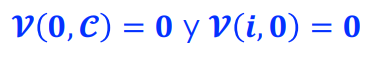

**Caso inductivo:**

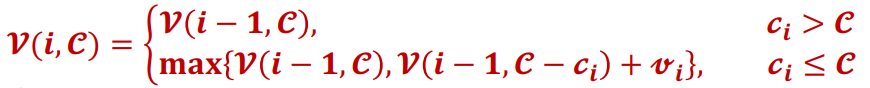

### **4.2. Correctitud de la implementación Greedy**

*El algoritmo **knap_sack_greedy** no es correcto*

Esto se debe a que no prueba todas las combinaciones posibles para armar la mochila, ya que la decisión greedy se basa en escoger los artículos con mayor proporción de valor en función de la unidad de peso, que si no consideramos las fracciones de un objeto para obtener la ganancia, podría un objeto de mucha capacidad llenar lo sufieciente la mochila para no soportar a un segundo objeto igual de beneficioso en términos del valor obtenido. como el siguiente ejemplo:


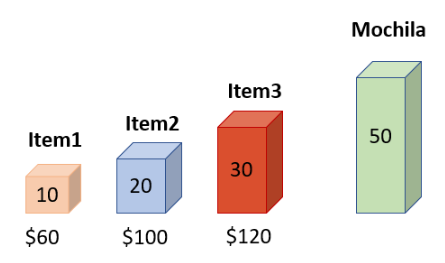

Con método greedy se escogerá el primer y segundo item, pero el tercero ya no cabe en la mochila, y esta **no se llenará por completo**, nos entrega una ganancia de \$160. Pero la mejor opción es llevarse el item 2 y el 3 donde la mochila **se llena por completo** con ganancia \$220.

In [82]:
capacidad_max = 50
valores = [60,100,120]
pesos = [10,20,30]
valor_max, pesoActual, c = knap_sack_greedy( capacidad_max, pesos, valores)
print("El valor máximo obtenido es:", valor_max)
print("Y la capacidad alcanzada de:", pesoActual)

El valor máximo obtenido es: 160
Y la capacidad alcanzada de: 30


In [84]:
capacidad_max = 50
valores = [60,100,120]
pesos = [10,20,30]
valor_max, c = knap_sack( capacidad_max, pesos, valores)
print_sol(valor_max, capacidad_max, pesos, valores)

Objetos en la bolsa de capacidad máxima 50:
Objeto 2 = 100 y peso = 20
Objeto 3 = 120 y peso = 30
Valor total = 220
Peso total = 50


## **5. Tiempo de ejecución**



### **5.1. Teorema de la implementación Bottom-up**


*El algoritmo **knap_sack** con acercamiento Bottom-up tiene un tiempo de ejecución $O(n·m)$ (Con $n$ como la cantidad de objetos y $m$ como la capacidad máxima).*

Para calcular el tiempo de ejecución del algoritmo se utilizará la siguiente fórmula obtenida del libro Algorithms Illuminated (Parte 4, página 107):

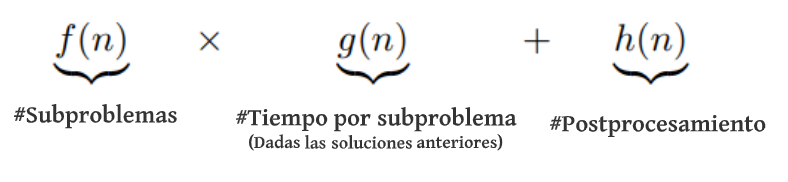

Entonces para obtener el tiempo de ejecución del algoritmo $T(n)$, primeramente debemos calcular las 3 funciones anteriores:

1.   $f(n)$: Se refiere a la cantidad de subproblemas en resolver. Para una mochila de capacidad máxima $m$ y una cantidad $n$ de artículos, resulta en una cantidad de $n·m$ subproblemas, debido a que hay un subproblema para cada capacidad y a su vez para cada objeto, ambos empezando desde el 1 hasta el valor real (Si consideramos que los casos triviales 0 ya están resuelto).

2.   $g(n)$: Se refiere al tiempo estimado por resolver cada subproblema, este es de complejidad O(1) ya que para resolver un subproblema cualquiera basta con dos instrucciones condicionales más una igualación

3.   $h(n)$: Se refiere al tiempo de ejecución en procesar la solución. En este caso es despreciable el valor de esta función, ya que buscamos una cota superior para el algoritmo y lo calculado es de orden $O(1)$ en la instrucción para retornar la matriz de soluciones.

Reemplazando obtendremos:
>$T(n) = (n·m)· O(1)$
>
>$T(n) = c·(n·m)$
>
>$T(n) = O(n·m)$






**Complejidad espacial**

*El algoritmo **knap_sack** tiene una complejidad espacial $O(n·m)$.*

Se obtiene el orden $O(n·m)$ en base a la cantidad de subproblemas anteriores utilizados para resolver el subproblema actual. Estos se pueden representar con una matriz, donde para obtener la solución final, primero se obtuvieron las soluciones para todas las capacidades de la mochila $c$ desde $0$ a la capacidad máxima$-1$ y para todos los artículos $i$ desde 0 hasta el último artículo$-1$.

Como se puede obaservar en la matriz presentada anteriormente:

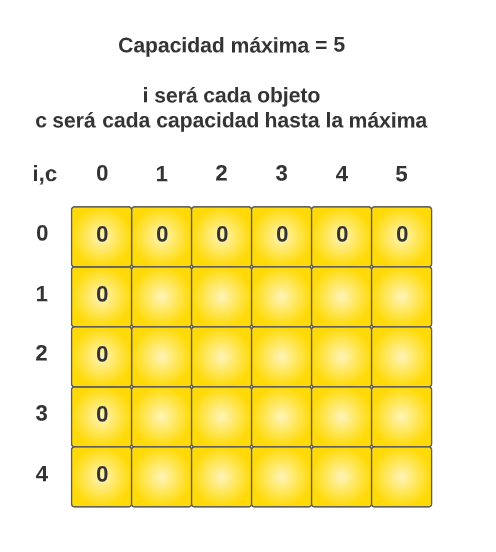

### **5.2. Teorema de la implementación Greedy**


*El algoritmo **knap_sack_greedy** tiene un tiempo de ejecución $O(n)$, con $n$ como la cantidad de objetos (considerando que se ingresan ordenados de mayor a menor en función del valor por unidad de peso.)*

Para llegar a este valor, primeramente debemos analizar todas las instrucciones realizadas en el algoritmo en función del tamaño de entrada:

*   Existe un ciclo for que recorrerá todos los elementos para agregarlos a la mochila si esque caben.
*   Las operaciones para agregar un objeto y restar la capacidad máxima son de orden $O(1)$ con instrucciones condicionales o de asignación.

Obtendremos:
>$T(n) = \sum_{i = 1}^{n}O(1)$
>
>$T(n) = \sum_{i = 1}^{n}c$
>
>$T(n) = c· n$
>
>$T(n) = O(n)$





*El algoritmo **knap_sack_greedy** tiene un tiempo de ejecución $O(n · log(n))$ si consideramos el ordenamiento previo de los artículos.*

Para llegar a este valor, al igual que antes, debemos analizar las instrucciones realizadas en el algoritmo en función del tamaño de entrada:


*   Antes de procesar los datos se debe ordenar los objetos en de mayor a menor en función del valor por unidad de peso. Se escogió utilizar QuickSort ya que es de los más óptimos, tiene tiempo promedio de complejidad $O(n·log(n))$
*   Luego se realiza el proceso descrito en el teorema anterior, donde existirá un ciclo for que recorrerá todos los elementos para agregarlos a la mochila si esque caben.
*   Las operaciones para agregar un objeto y restar la capacidad máxima son de orden $O(1)$ con instrucciones condicionales o de asignación.

Las operaciones post ordenado ya fueron calculadas con orden $O(n)$, solo queda reemplazar.

Obtendremos:
>$T(n) = O(n · log(n)) + O(n)$
>
>$T(n) = O(n · log(n))$



## **6. Experimentos**

#### **Generador de instancias**

In [61]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 50)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

In [62]:
print(W)
print(val)
print(wt)

24
[14, 27, 77, 84, 121, 158, 173, 216, 225, 253]
[5, 8, 1, 5, 9, 6, 2, 5, 2, 6]


### **6.1. Tiempo de ejecución implementación Botoom-up v/s Greedy**

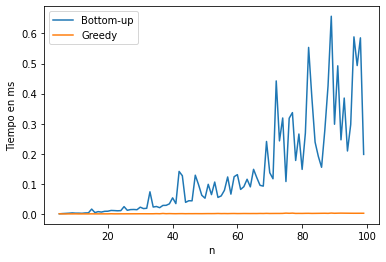

In [80]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]
y_bottom = []
y_greedy = []

for n in range(5,100):

  c_max, valores, pesos = knapsack_instance_generator(n)
  

  #la función repeat está ejecutando 20 veces  con con la instancia anterior retorna el mejor tiepo obtenido.
  t_bottom = repeat(setup="from __main__ import knap_sack", stmt=f"knap_sack({c_max},{pesos},{valores})", repeat=1, number=10)

  #la función repeat está ejecutando 20 veces  con con la instancia anterior retorna el mejor tiepo obtenido.
  t_greedy = repeat(setup="from __main__ import knap_sack_greedy", stmt=f"knap_sack_greedy({c_max},{pesos},{valores})", repeat=1, number=10)

  x.append(n)
  y_bottom.append(t_bottom)
  y_greedy.append(t_greedy)


plt.plot(x,y_bottom)
plt.plot(x,y_greedy)
plt.legend(["Bottom-up", "Greedy"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Podemos observar, en comparación de ambos algoritmos, que el método greedy es bastante más rápido que la implementación dinámica, como habíamos predicho en el tiempo de ejecución. Greedy es de orden $O(n log(n))$ y Bottom-up $O(nm)$, el primero influye de una sola variable, mientras que el segundo depende de 2 y es por esta razón que podemos observar irregularidades en el tiempo de Bottom-up, con la variable $n$ ascendiendo constantemente mientras que a $m$ se le asignan valores pseudoaleatorios en el instanceador de problemas.

### **6.2. Cantidad de procesos (subproblemas o iteraciones) Bottom-up v/s Greedy**

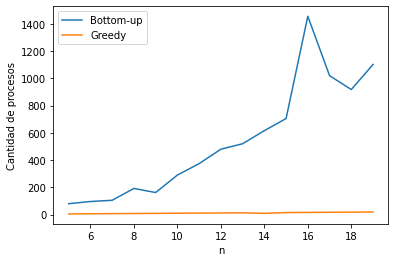

In [64]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y_bottom = []
y_greedy = []                         

for n in range(5,20):
  c_max, valores, pesos = knapsack_instance_generator(n)

  valores_max, c_bottom = knap_sack(c_max, pesos, valores)
  valor_max, pesoActual, c_greedy = knap_sack_greedy(c_max, pesos, valores)

  y_bottom.append(c_bottom)
  y_greedy.append(c_greedy)

plt.plot(x,y_bottom)
plt.plot(x,y_greedy)
plt.legend(["Bottom-up", "Greedy"])

plt.xlabel('n')
plt.ylabel('Cantidad de procesos')
plt.show()

Las irregularidades de los procesos del algoritmo que utiliza Bottom-up se deben a la variable $m$ que corresponde a la capacidad máxima de la mochila para cada problema, donde no son consistentes, tomando valores bajos algunas veces y altos otras veces. Las comparaciones para el método greedy solo considera el orden lineal de agregar elementos a la mochila y no la de ordenar antes por los valores sobre unidad de peso para tomar las decisión greedy, pero aun considerando esos procesos la diferencia entre ambos algoritmos sería bastante similar, al igual que como sucedió con el tiempo de ejecución, esto debido por el orden de los algoritmos, que sin considerar la variable $n$, $m$ es mucho más probable que sea mayor a $log(n)$.

### **6.3. Ganancias máximas obtenidas por ambos algoritmos**

In [71]:
import pandas as pd
import numpy as np
from plotnine import *

df_ganancias = pd.DataFrame()

df_ganancias['Algoritmo'] = ['Bottom-up', 'Greedy']

for n in range(5,51,5):
  c_max, valores, pesos = knapsack_instance_generator(n)

  valores_max, c_bottom = knap_sack(c_max, pesos, valores)
  valor_max_bottom = valores_max[len(valores)][c_max]
  valor_max_greedy, pesoActual, c_greedy = knap_sack_greedy(c_max, pesos, valores)
  df_ganancias[str(n)] = [valor_max_bottom, valor_max_greedy]

print(df_ganancias)


   Algoritmo    5    10    15    20    25    30     35     40     45     50
0  Bottom-up  215  1203  2288  3419  4712  8585  10112  12788  18397  26134
1     Greedy  186  1203  2288  3419  4619  8585  10059  12788  18397  26134


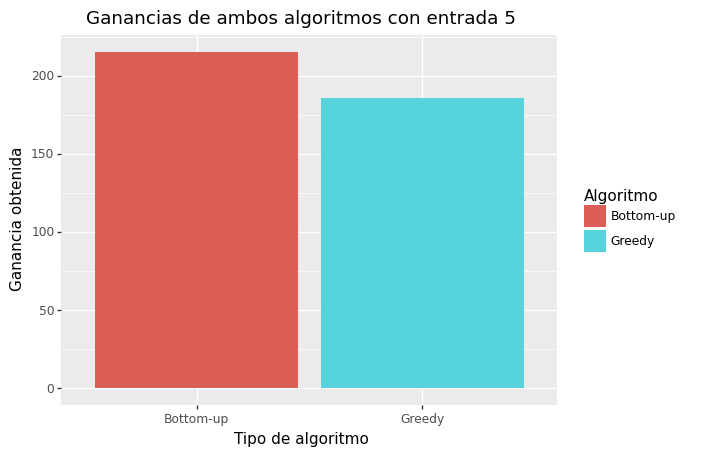

<ggplot: (8731540202989)>

In [79]:
(
  ggplot(df_ganancias)+
  aes(x='Algoritmo', y='5', fill = 'Algoritmo')+
  geom_bar(position = "dodge" ,stat="identity")+ 
  theme_grey()+
  ggtitle("Ganancias de ambos algoritmos con entrada 5")+
  xlab("Tipo de algoritmo")+
  ylab("Ganancia obtenida")
)

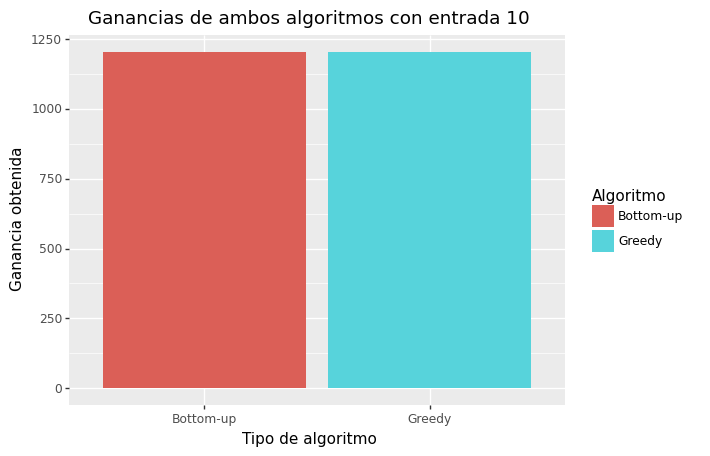

<ggplot: (8731540318037)>

In [78]:
(
  ggplot(df_ganancias)+
  aes(x='Algoritmo', y='10', fill = 'Algoritmo')+
  geom_bar(position = "dodge" ,stat="identity")+ 
  theme_grey()+
  ggtitle("Ganancias de ambos algoritmos con entrada 10")+
  xlab("Tipo de algoritmo")+
  ylab("Ganancia obtenida")
)

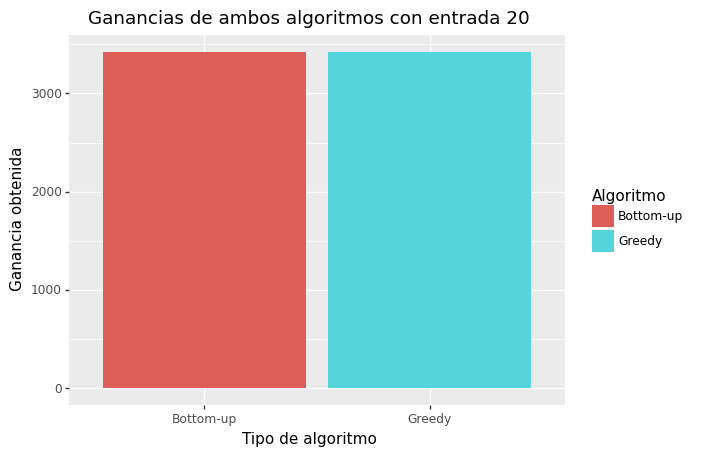

<ggplot: (8731540467917)>

In [77]:
(
  ggplot(df_ganancias)+
  aes(x='Algoritmo', y='20', fill = 'Algoritmo')+
  geom_bar(position = "dodge" ,stat="identity")+ 
  theme_grey()+
  ggtitle("Ganancias de ambos algoritmos con entrada 20")+
  xlab("Tipo de algoritmo")+
  ylab("Ganancia obtenida")
)

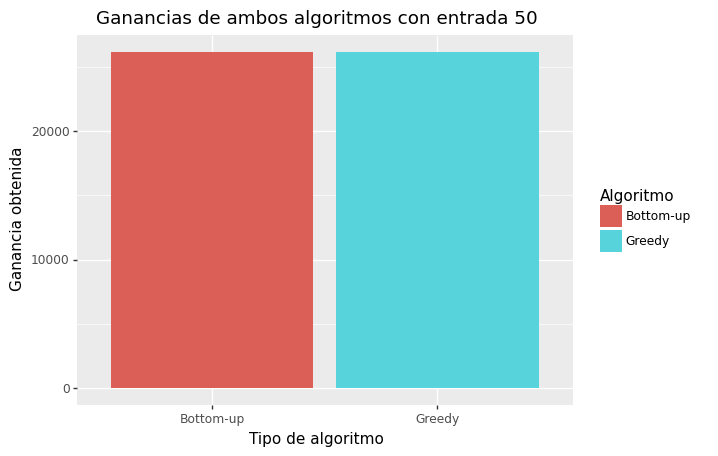

<ggplot: (8731540457565)>

In [76]:
(
  ggplot(df_ganancias)+
  aes(x='Algoritmo', y='50', fill = 'Algoritmo')+
  geom_bar(position = "dodge" ,stat="identity")+ 
  theme_grey()+
  ggtitle("Ganancias de ambos algoritmos con entrada 50")+
  xlab("Tipo de algoritmo")+
  ylab("Ganancia obtenida")
)

Si bien algunas veces el método Greedy entrega resultados bastante acertados, no siempre es lo correcto, puesto que como podemos observar con el primer gráfico, la diferencia es verdaderamente notoria entre un algoritmo y otro. Sabemos que el algoritmo con acercamiento Bottom-up es correcto y que el algoritmo Greedy no lo es, entonces cuando necesitamos una ganancia máxima óptima, mayor que cualquiera, nos conviene implementar el método que utiliza programación dinámica, siendo más costoso en tiempo y espacio, pero si queremos solo obtener una solución óptim,a sin importar si es la mayor de todas, el método Greedy es la solución, siendo un algoritmo rápido (en tiempo de ejecución) en esta tarea.